In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r"D:\Mtrx\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [8]:
df = df.drop(["chol"], axis = 1)

In [9]:
df

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,0,1,115,1,1.2,1,1,3,0


In [10]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

c:\Users\arzuh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


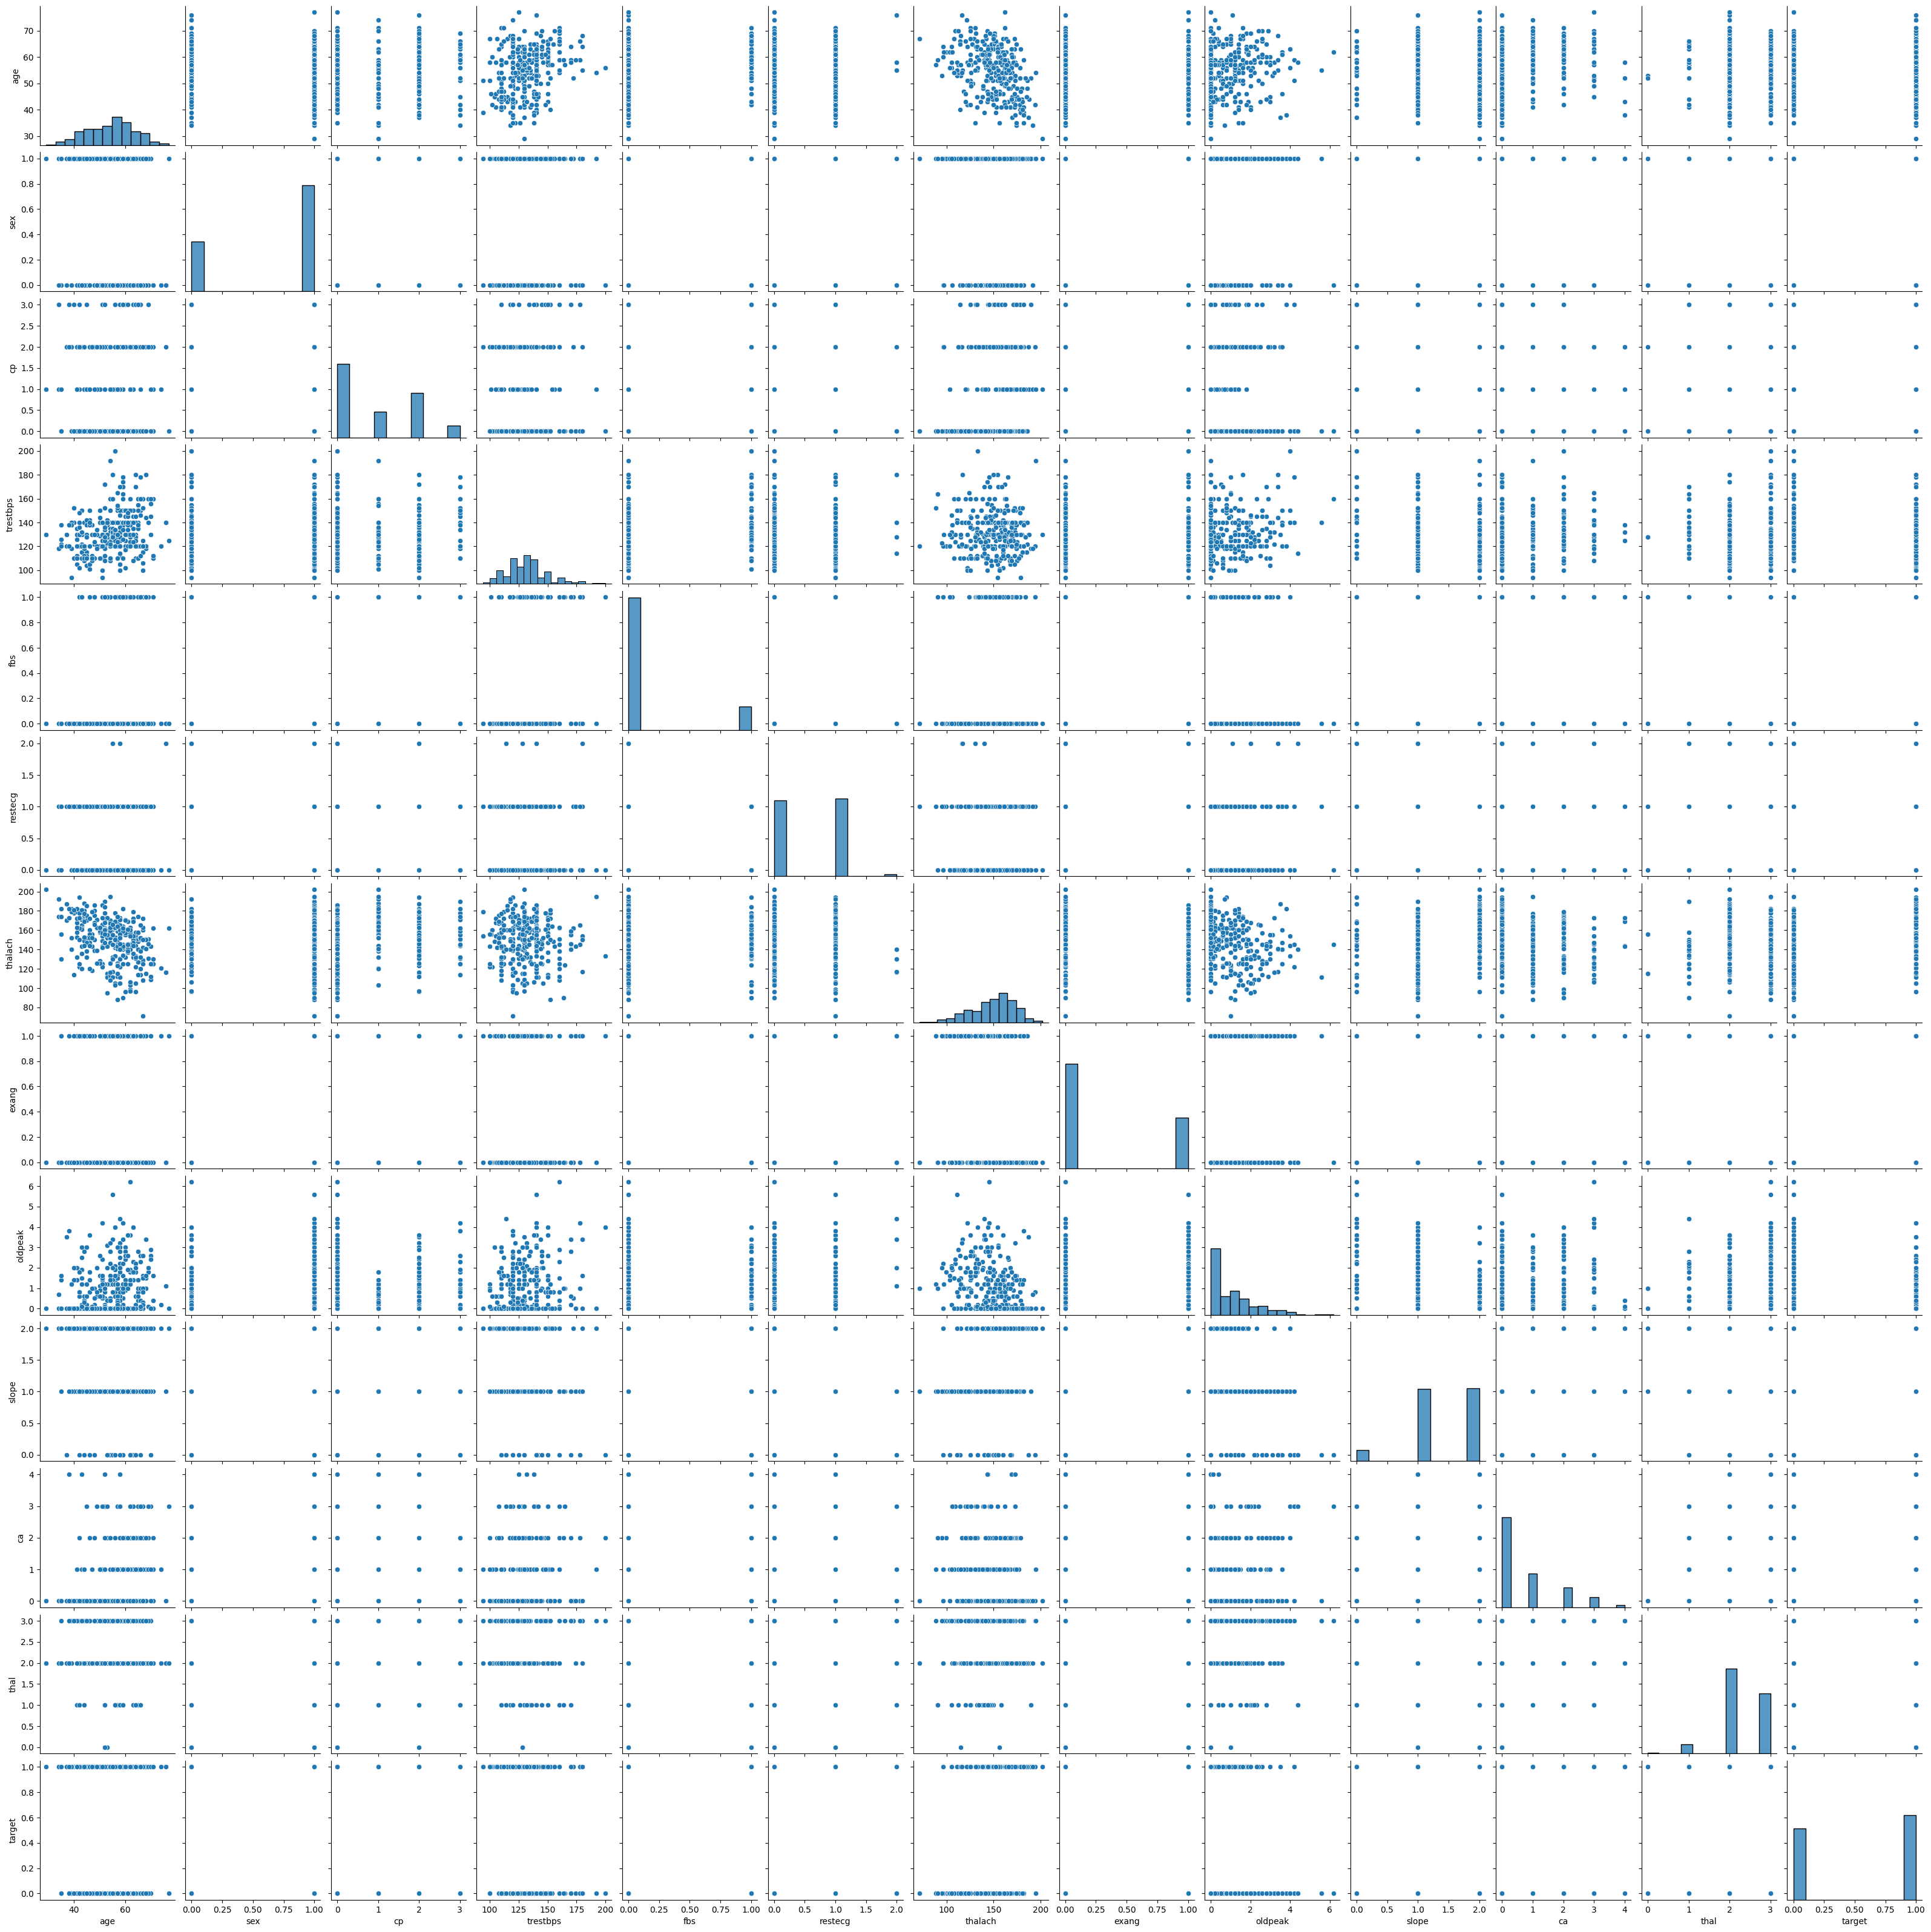

In [11]:
sns.pairplot(df)

# Modeling

## PCA


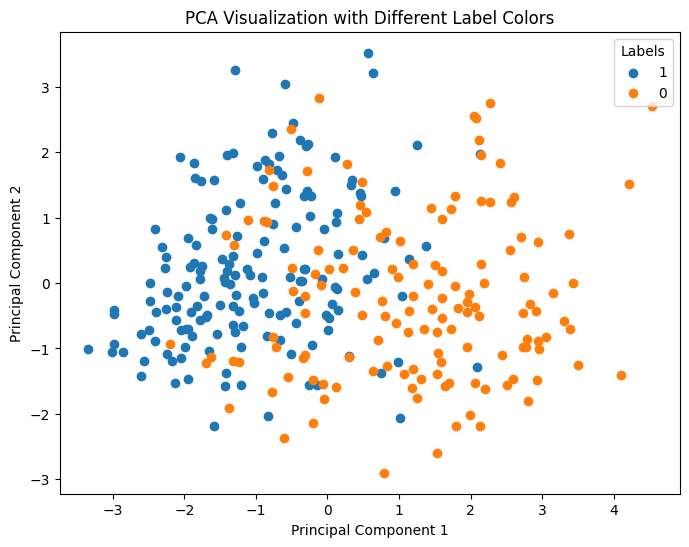

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.preprocessing import StandardScaler


X = df.drop('target', axis=1)  
y = df['target'] 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

n_components = 2 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(8, 6))
labels = y.unique() 

for label in labels:
    mask = (y == label)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.title('PCA Visualization with Different Label Colors')
plt.show()


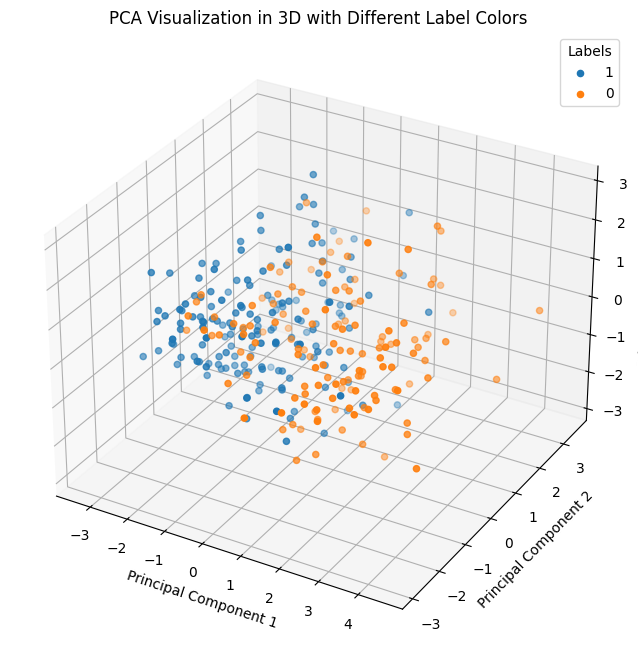

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


n_components = 3  # Set the number of components to 3 for 3D visualization
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

labels = y.unique()

for label in labels:
    mask = (y == label)
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], label=label)  # Plot in 3D

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(title='Labels')
ax.set_title('PCA Visualization in 3D with Different Label Colors')

plt.show()


In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
           df['target'], test_size=0.30, 
            random_state=101)

# Support Vector Machine

In [17]:
from sklearn import svm

clf = svm.SVC(kernel='poly', probability=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Accuracy: 0.6813186813186813
#Precision: 0.6507936507936508
#Recall: 0.8541666666666666

In [18]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [19]:
y_test


162    1
8      1
89     1
154    1
201    0
      ..
270    0
85     1
219    0
31     1
190    0
Name: target, Length: 91, dtype: int64

In [20]:
# Create an SVM classifier with a Linear kernel
linear_svm = svm.SVC(kernel='linear', probability=True)
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)

#Accuracy: 0.8681318681318682
#Precision: 0.8214285714285714
#Recall: 0.9583333333333334

In [21]:
# Create an SVM classifier with an RBF kernel
rbf_svm = svm.SVC(kernel='rbf', probability=True)
rbf_svm.fit(X_train, y_train)
 
y_pred = rbf_svm.predict(X_test)

#Accuracy: 0.6593406593406593
#Precision: 0.6307692307692307
#Recall: 0.8541666666666666

Evaluation of SVM

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6703296703296703
Precision: 0.6323529411764706
Recall: 0.8958333333333334


In [24]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.63      0.90      0.74        48

    accuracy                           0.67        91
   macro avg       0.71      0.66      0.64        91
weighted avg       0.70      0.67      0.65        91



In [25]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

print('Confusion Matrix for SVM:''\n',cm3 )

print('Accuracy Score for SVM:',score3 )

print('Auc Score for svm:',auc3 )

Confusion Matrix for SVM:
 [[18 25]
 [ 5 43]]
Accuracy Score for SVM: 0.6703296703296703
Auc Score for svm: 0.657218992248062


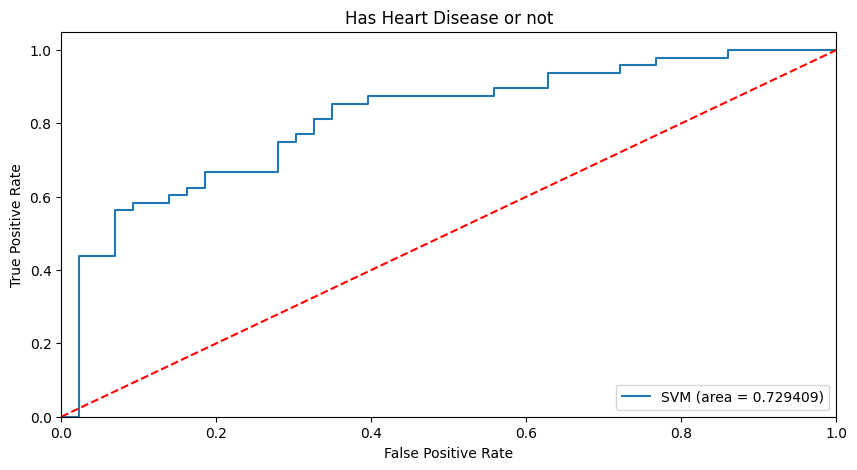

In [26]:
from sklearn.metrics import roc_curve
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Has Heart Disease or not')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier 

In [28]:
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Accuracy: 0.7362637362637363
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        43
           1       0.75      0.75      0.75        48

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



In [29]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth= 30 )
clf_entropy = clf_entropy.fit(X_train,y_train)
y_pred = clf_entropy.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Accuracy: 0.8021978021978022
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        43
           1       0.80      0.83      0.82        48

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



# Random Forest


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = None)

rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [31]:
y_pred = rf.predict(X_test)

In [32]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [33]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.79      0.88      0.83        48

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# Naive Bayes


In [34]:
from sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)


GaussianNB()

In [35]:

predicted = NBmodel.predict(X_test)
predicted

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [36]:
predictions_proba = NBmodel.predict_proba(X_test)
predictions_proba

array([[1.68892534e-03, 9.98311075e-01],
       [2.63922153e-02, 9.73607785e-01],
       [2.82627183e-01, 7.17372817e-01],
       [1.04507392e-03, 9.98954926e-01],
       [9.99884709e-01, 1.15291213e-04],
       [6.35512121e-03, 9.93644879e-01],
       [1.64650457e-03, 9.98353495e-01],
       [9.99867791e-01, 1.32208547e-04],
       [9.97735162e-01, 2.26483838e-03],
       [2.03330518e-01, 7.96669482e-01],
       [9.76157386e-01, 2.38426144e-02],
       [1.04237280e-01, 8.95762720e-01],
       [7.58990024e-01, 2.41009976e-01],
       [7.78508938e-01, 2.21491062e-01],
       [1.24324606e-02, 9.87567539e-01],
       [2.27645346e-02, 9.77235465e-01],
       [4.49626691e-04, 9.99550373e-01],
       [1.05068137e-01, 8.94931863e-01],
       [1.25286286e-02, 9.87471371e-01],
       [9.96761416e-01, 3.23858359e-03],
       [9.96016840e-01, 3.98316027e-03],
       [9.95537836e-01, 4.46216395e-03],
       [6.03278639e-01, 3.96721361e-01],
       [8.76166306e-01, 1.23833694e-01],
       [9.461975

In [37]:
second_elements = predictions_proba[:, 1]
second_elements

array([9.98311075e-01, 9.73607785e-01, 7.17372817e-01, 9.98954926e-01,
       1.15291213e-04, 9.93644879e-01, 9.98353495e-01, 1.32208547e-04,
       2.26483838e-03, 7.96669482e-01, 2.38426144e-02, 8.95762720e-01,
       2.41009976e-01, 2.21491062e-01, 9.87567539e-01, 9.77235465e-01,
       9.99550373e-01, 8.94931863e-01, 9.87471371e-01, 3.23858359e-03,
       3.98316027e-03, 4.46216395e-03, 3.96721361e-01, 1.23833694e-01,
       5.38024194e-02, 9.92201067e-01, 1.14026415e-05, 9.81839394e-01,
       2.44615583e-05, 9.98966280e-01, 3.35154907e-05, 4.67879288e-01,
       8.92129618e-01, 5.56064636e-01, 9.97388653e-01, 6.62708504e-01,
       9.95792704e-01, 8.88256316e-01, 9.96638631e-01, 9.98956273e-01,
       1.51127982e-05, 9.96870965e-01, 9.95549698e-01, 8.00156182e-01,
       1.78882084e-03, 6.92717245e-01, 6.47082211e-01, 9.99393605e-01,
       9.99908119e-01, 8.24442300e-02, 1.67494501e-04, 3.80627546e-01,
       1.04054346e-02, 4.55566360e-03, 4.88972301e-01, 4.62849090e-02,
      

In [38]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

print('Confusion Matrix for Naive Bayes:''\n',cm2 )
print('Accuracy Score for Naive Bayes:',score2 )
print('Classification Report for Naive Bayes:''\n''\n',cr2)
print('Auc Score for Naive Bayes:',auc2 )

Confusion Matrix for Naive Bayes:
 [[34  9]
 [ 4 44]]
Accuracy Score for Naive Bayes: 0.8571428571428571
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.89      0.79      0.84        43
           1       0.83      0.92      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

Auc Score for Naive Bayes: 0.8536821705426356


# K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [40]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Confusion matrix 
 [[24 19]
 [14 34]]
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        43
           1       0.64      0.71      0.67        48

    accuracy                           0.64        91
   macro avg       0.64      0.63      0.63        91
weighted avg       0.64      0.64      0.64        91



c:\Users\arzuh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: ylabel='Feature'>

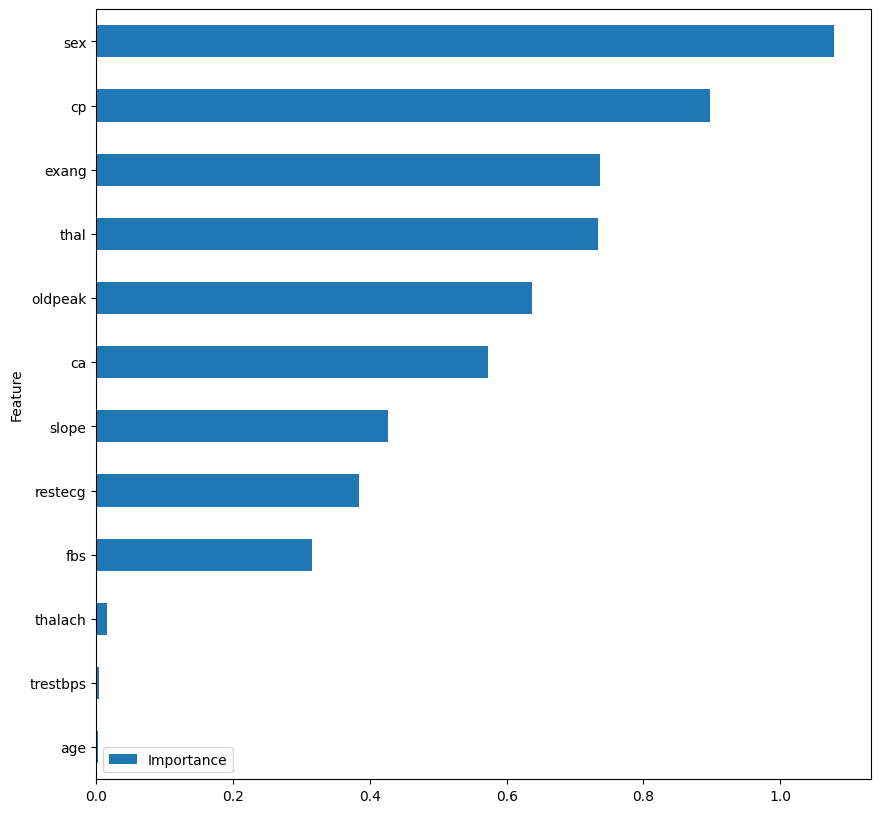

In [41]:

from sklearn.linear_model import LogisticRegression #create an instance and fit the model 

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

coefficients = logmodel.coef_[0]
coefficients = logmodel.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 10))

In [45]:
df1 = df.drop (["age", "trestbps", "thalach"], axis = 1)

In [46]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [47]:
predicted = logmodel.predict(X_test)
predicted

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [48]:
predictions_proba = logmodel.predict_proba(X_test)

In [49]:
predictions_proba

array([[0.08171436, 0.91828564],
       [0.14946725, 0.85053275],
       [0.31668596, 0.68331404],
       [0.02050637, 0.97949363],
       [0.98240806, 0.01759194],
       [0.14960262, 0.85039738],
       [0.16577227, 0.83422773],
       [0.97551726, 0.02448274],
       [0.67898941, 0.32101059],
       [0.25704067, 0.74295933],
       [0.63682535, 0.36317465],
       [0.32524144, 0.67475856],
       [0.26061942, 0.73938058],
       [0.65711994, 0.34288006],
       [0.08957042, 0.91042958],
       [0.21499997, 0.78500003],
       [0.0146951 , 0.9853049 ],
       [0.26159334, 0.73840666],
       [0.2779181 , 0.7220819 ],
       [0.96159263, 0.03840737],
       [0.9473288 , 0.0526712 ],
       [0.93202686, 0.06797314],
       [0.19774418, 0.80225582],
       [0.75922219, 0.24077781],
       [0.90198422, 0.09801578],
       [0.0569123 , 0.9430877 ],
       [0.98417879, 0.01582121],
       [0.21761508, 0.78238492],
       [0.98075586, 0.01924414],
       [0.07921237, 0.92078763],
       [0.

In [50]:
predictions_proba.shape

(91, 2)

In [51]:
second_elements = predictions_proba[:, 1]
second_elements

array([0.91828564, 0.85053275, 0.68331404, 0.97949363, 0.01759194,
       0.85039738, 0.83422773, 0.02448274, 0.32101059, 0.74295933,
       0.36317465, 0.67475856, 0.73938058, 0.34288006, 0.91042958,
       0.78500003, 0.9853049 , 0.73840666, 0.7220819 , 0.03840737,
       0.0526712 , 0.06797314, 0.80225582, 0.24077781, 0.09801578,
       0.9430877 , 0.01582121, 0.78238492, 0.01924414, 0.92078763,
       0.01748162, 0.73419648, 0.84441176, 0.51501885, 0.96423744,
       0.64962764, 0.91330455, 0.77256062, 0.91256914, 0.95954925,
       0.0148083 , 0.87046202, 0.93525074, 0.74584424, 0.04036682,
       0.57048768, 0.44860174, 0.9684017 , 0.99167193, 0.20378126,
       0.04670052, 0.18204768, 0.13986678, 0.2369734 , 0.81850958,
       0.09065289, 0.11067925, 0.99451898, 0.95051277, 0.48463019,
       0.91549723, 0.66611008, 0.12459545, 0.92391417, 0.34653247,
       0.19940432, 0.84802503, 0.71037761, 0.97294841, 0.85289857,
       0.97982847, 0.43758453, 0.89656625, 0.26831707, 0.98575

In [52]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

print('Confusion Matrix for  Logistic REgression:''\n',cm2 )
print('Accuracy Score for Logistic REgression:',score2 )
print('Classification Report for Logistic REgression:''\n''\n',cr2)
print('Auc Score for Logistic REgression:',auc2 )

Confusion Matrix for  Logistic REgression:
 [[34  9]
 [ 4 44]]
Accuracy Score for Logistic REgression: 0.8571428571428571
Classification Report for Logistic REgression:

               precision    recall  f1-score   support

           0       0.89      0.79      0.84        43
           1       0.83      0.92      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

Auc Score for Logistic REgression: 0.8536821705426356


In [1]:
!pip install lazypredict

     ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
     ------------ --------------------------- 30.7/97.9 kB 1.4 MB/s eta 0:00:01
     --------------------------- ---------- 71.7/97.9 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 97.9/97.9 kB 804.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/99.7 MB ? eta -:--:--
     ---------------------------------------- 0.2/99.7 MB 2.9 MB/s eta 0:00:35
     ---------------------------------------- 0.4/99.7 MB 3.9 MB/s eta 0:00:26
     ---------------------------------------- 0.5/99.7 MB 3.2 MB/s eta 0:00:32
     ---------------------------------------- 0.9/99.7 MB 4.4 MB/s eta 0:00:23
     ---------------------------------------- 1.1/99.7 MB 4.5 MB/s eta 0:00:22
      --------------------------------------- 1.5/99.7 MB 5.1 MB/s eta 0:00:20
      --------------------------------------- 1.9/99.7 MB 5.5 MB/s eta


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install ycimpute

     ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/192.3 MB 1.7 MB/s eta 0:01:57
     ---------------------------------------- 0.1/192.3 MB 1.1 MB/s eta 0:03:04
     ---------------------------------------- 0.2/192.3 MB 1.5 MB/s eta 0:02:11
     ---------------------------------------- 0.3/192.3 MB 1.4 MB/s eta 0:02:15
     ---------------------------------------- 0.5/192.3 MB 2.0 MB/s eta 0:01:36
     ---------------------------------------- 0.5/192.3 MB 1.9 MB/s eta 0:01:42
     ---------------------------------------- 0.7/192.3 MB 2.4 MB/s eta 0:01:19
     ---------------------------------------- 1.0/192.3 MB 3.1 MB/s eta 0:01:03
     ---------------------------------------- 1.2/192.3 MB 3.2 MB/s eta 0:01:00
     ---------------------------------------- 1.7/192.3 MB 3.9 MB/s eta 0:00:49
     ---------------------------------------- 2.2/192.3 MB 4.7 MB/s eta 0:00:41
      --------------------------------------- 2


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
